In [1]:
# Import the required libraries: Pandas, Numpy, Matplotlib and   Seaborn

import pandas as pd          
import numpy as np 
import datetime
import seaborn as sns # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")


In [2]:

# Load and read the data from the Dataset

df=pd.read_csv("catalog.csv",encoding = "ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1693 non-null   int64  
 1   date                  1690 non-null   object 
 2   time                  629 non-null    object 
 3   continent_code        164 non-null    object 
 4   country_name          1693 non-null   object 
 5   country_code          1693 non-null   object 
 6   state/province        1692 non-null   object 
 7   population            1693 non-null   int64  
 8   city/town             1689 non-null   object 
 9   distance              1692 non-null   float64
 10  location_description  551 non-null    object 
 11  latitude              1692 non-null   float64
 12  longitude             1692 non-null   float64
 13  geolocation           1692 non-null   object 
 14  hazard_type           1693 non-null   object 
 15  landslide_type       

In [3]:
# Check the data type of our date column

# Print the first few rows of the date column

a=(df['date'].head())
a

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [4]:
# check the data type of our date column

c=df['date'].dtype
c


dtype('O')

In [5]:
# Finding  the data column rows that are throwing errors

print(pd.to_datetime(df['date'], errors='coerce', format="%m/%d/%Y"))
mask = pd.to_datetime(df['date'], errors='coerce', format="%m/%d/%Y").isnull()
print (df['date'][mask])


0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
1688   NaT
1689   NaT
1690   NaT
1691   NaT
1692   NaT
Name: date, Length: 1693, dtype: datetime64[ns]
0        3/2/07
1       3/22/07
2        4/6/07
3       4/14/07
4       4/15/07
         ...   
1688    12/7/15
1689    2/22/16
1690    2/23/16
1691    2/26/16
1692     3/2/16
Name: date, Length: 1693, dtype: object


In [6]:
# Convert our date columns to data time 1

d=df['date'] = pd.to_datetime(df['date'])
d.sample(2)

682    2011-04-30
1475   2015-06-27
Name: date, dtype: datetime64[ns]

Convert our date columns to datetime

In [7]:
# Convert our date columns to datetime
# Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

# Create a new column, date_parsed, with the parsed dates

g=df['date_parsed'] = pd.to_datetime(df['date'], format = "%m/%d/%y")
g.sample(3)



796    2011-07-21
164    2008-11-20
1091   2013-08-23
Name: date, dtype: datetime64[ns]

In [8]:
# Check the first few rows of the new date column
# The dates have been re_arranged to fit their default  order datetime objects(year, month, day)

z=df['date_parsed'].head()
z
# We  have succesfully parsed our date column

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [9]:
# check the data type of our our parsed date column

df['date_parsed'].dtype

dtype('<M8[ns]')

What if I run into an error with multiple date formats? While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have have pandas try to infer what the right date format should be. You can do that like so:

In [10]:

# Infer the date  format in pandas

df['date_parsed'] = pd.to_datetime(df['date'], infer_datetime_format=True)



Why don't you always use infer_datetime_format = True? There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.


In [11]:
# Select just the day of the month from our column

# get the day of the month from the date_parsed column

day_of_month_df= df['date_parsed'].dt.day
day_of_month_df.sample(3)


257      5.0
1401    27.0
427     28.0
Name: date_parsed, dtype: float64

In [12]:
# Plot the day of the month to check the date parsing

# remove na's
day_of_month_df123 = day_of_month_df.dropna()
day_of_month_df123.sample(3)

1387    25.0
991     17.0
1234    30.0
Name: date_parsed, dtype: float64

<AxesSubplot:xlabel='date_parsed'>

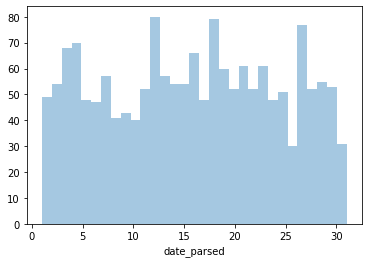

In [13]:
# Plot the day of the month using the day of the month after removing the Missing Nans Values in the parsed date time column

sns.distplot(day_of_month_df123, kde=False, bins=31)


Congratulations, we have parsed our dates correctly and the graph makes good sense

